# Analyse AirBNB Dataset
### Dataset AirBNB advertenties Amsterdam juni 2016

## Inhoud
1. Data importeren, bekijken en opschonen  
2. Omvang en omzet AirBNB markt Amsterdam  
3. Divisie buurten Amsterdam & kaartweergave 
4. Wat is de return on investment (ROI) van een woning die permanent verhuurd wordt via Airbnb?  
5. Welke overtredingen van regels mbt verhuur vind je in de data? Om hoeveel euro gaat dit ongeveer?  
6. Welke aanbeveling zou je aan de gemeente Amsterdam doen op basis van deze data? En welke aanbeveling aan verhuurders? En toeristen?

## 1. Data importeren, bekijken en opschonen

### 1.1 Data importeren en bekijken

In [35]:
#Importen van de libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
#Inlezen van de data
data = pd.read_csv("data/listings.csv")

In [37]:
#Data bekijken
print(data.head(2),"\n")
print((data.shape),"\n")
print(data.info(),"\n")
print(data.describe(include='all'),"\n")
print(data.columns,"\n")

         id                                         name   host_id host_name  \
0   9784567                       nice Room in Amsterdam  27280608     Petra   
1  13163805  Best cost benefit room near a metro station  35491461   Phillip   

   neighbourhood_group neighbourhood   latitude  longitude     room_type  \
0                  NaN  Bijlmer-Oost  52.323369   4.977730  Private room   
1                  NaN  Bijlmer-Oost  52.315635   4.978166  Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     95               1                  5  2016-06-27               0.81   
1     60               1                  4  2016-06-27               4.00   

   calculated_host_listings_count  availability_365  
0                               3               365  
1                               1                77   

(13849, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13849 entries, 0 to 13848
Data columns (total 16 columns):
id      

<b>Eerste observaties</b>  
• 13849 rijen en 16 kolommen  
• Kolom 'neighbourhood_group' heeft alleen NaN values  
• Kolom 'host_name' heeft 36 missende waardes  
• Kolommen 'last_review' and 'reviews_per_month' hebben ongeveer 2500 missende waardes  
• Kolom 'last_review' vertegenwoordigt een datum  
• Geografische locatie is vermeld met lengte- en breedtegraad

### 1.2 Dataset opschonen
#### 1.2.1 Verwijder kolom 'neighbourhood_group'

In [38]:
data = data.drop('neighbourhood_group', axis=1)

#### 1.2.2. Converteer 'last_review' (type object) naar type datetime

In [39]:
data['last_review'] = pd.to_datetime(data['last_review'])

#### 1.2.3. Controleer missende waardes van 'host_name'

In [40]:
print('Aantal missende waardes in \'host_name\':', data[data['host_name'].isnull()]['host_name'].size)
data[data['host_name'].isnull()].sample(4)

Aantal missende waardes in 'host_name': 36


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3865,10003118,A very nice room in the city center,51386084,NaN,Centrum-Oost,52.374132,4.924045,Private room,60,1,5,2016-05-03,0.81,1,0
1417,6280325,View on the Best Amsterdam square!,6594526,NaN,Centrum-West,52.374014,4.899873,Private room,85,7,65,2016-06-22,4.97,1,14
1355,9894640,Designer Penthouse in the Jordaan,1165322,NaN,Centrum-West,52.380228,4.890471,Entire home/apt,401,2,5,2016-03-23,0.82,1,0
13163,10227700,Leuke Kamer,52558016,NaN,Bos en Lommer,52.378448,4.857322,Private room,120,1,1,2015-12-29,0.16,1,0


Bij deze 36 advertenties is 'host_name' niet ingevuld. Dit lijkt verder geen probleem.

#### 1.2.4 controleer de ~2500 missende waardes van 'last_review'

In [41]:
data[data['last_review'].isnull()].sample(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3968,13429614,"Prime location, roomy and furnished",57525352,Aviv,Centrum-Oost,52.364328,4.884789,Entire home/apt,130,3,0,NaT,NaN,1,32
9698,13153337,Great apartment next to Vondelpark & Museumsquare,33654779,Sterre,Zuid,52.356912,4.876455,Entire home/apt,115,4,0,NaT,NaN,2,0
11059,13720429,Beautiful apartment near Leidse / Museum Square,13802555,Charissa,De Baarsjes - Oud-West,52.364164,4.878150,Entire home/apt,100,1,0,NaT,NaN,1,0
10005,13685274,light and comfortable apartment,79701838,Irene,Buitenveldert - Zuidas,52.332572,4.873685,Entire home/apt,111,1,0,NaT,NaN,1,0
9400,13322309,NEW DESIGNED APT. IN AMSTERDAM ZUID.,14183886,Luis,Zuid,52.345490,4.859105,Entire home/apt,95,2,0,NaT,NaN,19,35


Elke advertentie in deze <b>sample</b> heeft waarde 0 bij 'number_of_reviews' en waarde NaN bij 'reviews_per_month'.

In [42]:
#Controleer of alle advertenties zonder laatste review waarde 0 hebben bij 'aantal reviews' en geen waarde hebben bij 'reviews per maand'.
last_review_vs_number_of_reviews_check = (data[data['last_review'].isnull()].index == (data[data['number_of_reviews'] == 0].index)).all()
last_review_vs_reviews_per_month_check = (data[data['last_review'].isnull()].index == data[data['reviews_per_month'].isnull()].index).all()
print('last_review_NaT = number_of_reviews_0:', last_review_vs_number_of_reviews_check)
print('last_review_NaT = reviews_per_month_NaN:',last_review_vs_reviews_per_month_check)

last_review_NaT = number_of_reviews_0: True
last_review_NaT = reviews_per_month_NaN: True


In [43]:
#Tel het aantal advertenties zonder reviews
ads_zonder_review = data['last_review'].isnull().sum()
print('Aantal advertenties zonder reviews en geen waarbe bij \'laatste review\' en \'reviews per maand\':', ads_zonder_review)

Aantal advertenties zonder reviews en geen waarbe bij 'laatste review' en 'reviews per maand': 2463


In [44]:
#Converteer missende waardes in 'reviews_per_month' naar waarde 0
data.loc[data['reviews_per_month'].isnull(), 'reviews_per_month'] = 0

#### 1.2.5 Controle opschonen van de dataset

In [45]:
data.sample(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4535,3944495,Perfectly Located Studio,6461575,Paul & Joanna,Centrum-Oost,52.363037,4.885691,Entire home/apt,99,2,108,2016-06-25,4.92,1,277
11389,49790,Luxurous Houseboat-Great Location,227530,Klaas,De Baarsjes - Oud-West,52.362664,4.861032,Entire home/apt,199,3,87,2016-06-05,1.39,1,245
3353,342312,"Cosy apartment 50m2, baby-friendly!",1737154,Tim & Adriana,Oostelijk Havengebied - Indische Buurt,52.365644,4.938439,Entire home/apt,80,2,10,2016-05-19,0.20,1,14
11972,237017,Cozy & stylish near Jordan/Centre,1158389,Anke,De Baarsjes - Oud-West,52.371493,4.862764,Entire home/apt,80,4,14,2016-01-06,0.31,1,184
106,3539616,kamer in dijkhuis aan IJsselmeer,17818756,Peter,Noord-Oost,52.377789,4.993286,Private room,80,2,6,2016-03-29,0.26,1,239


<b>Overzicht aanpassingen aan de dataset:</b>  
• Kolom 'neighbourhood_group' is verwijderd  
• Kolom 'last_review' is veranderd naar type datetime  
• Missende waardes in kolom 'reviews_per_month' zijn veranderd naar waarde 0

### 1.3 Inhoud van de kolommen bekijken

In [46]:
#Bekijk de unieke waardes per kolom
for col in data.columns:
    print(col + ":", data[col].unique(), '\n')

id: [ 9784567 13163805  3719167 ... 13450662 13722497 13612056] 

name: ['nice Room in Amsterdam' 'Best cost benefit room near a metro station'
 'Nice  room in A´dam SE near nature & heart centre' ...
 'Fab home 15minutes from the city centre'
 'Spacious, split level appt 5 pers' 'Family House near Amsterdam'] 

host_id: [27280608 35491461 18991270 ... 32748297 19237729 78791769] 

host_name: ['Petra' 'Phillip' 'Maria' ... 'Sissi' 'Varol' 'Raphael'] 

neighbourhood: ['Bijlmer-Oost' 'Noord-Oost' 'Noord-West' 'Oud-Noord'
 'IJburg - Zeeburgereiland' 'Centrum-West'
 'Oostelijk Havengebied - Indische Buurt' 'Centrum-Oost' 'Oud-Oost'
 'Watergraafsmeer' 'Gaasperdam - Driemond' 'Westerpark' 'Bijlmer-Centrum'
 'De Pijp - Rivierenbuurt' 'Zuid' 'Buitenveldert - Zuidas'
 'De Baarsjes - Oud-West' 'Bos en Lommer' 'Geuzenveld - Slotermeer'
 'Slotervaart' 'Osdorp' 'De Aker - Nieuw Sloten'] 

latitude: [52.32336932 52.31563541 52.31671072 ... 52.34209316 52.33515297
 52.34024521] 

longitude: [4.977729

 '2013-03-23T00:00:00.000000000' '2015-04-16T00:00:00.000000000'] 

reviews_per_month: [ 0.81  4.    0.48  1.62  0.65  0.    0.51  0.5   1.    0.57  0.07  0.68
  1.48  3.58  5.45  3.8   1.53  0.6   0.38  1.14  5.37  2.05  3.73  1.68
  3.42  1.24  3.44  1.12  2.08  3.54  2.1   5.33  2.69  1.02  0.46  0.26
  4.55  1.92  3.46  0.9   5.21  2.67  5.    3.85  0.16  5.65  0.75  1.84
  4.84  0.85  5.08  1.3   2.07  2.31  0.09  1.81  0.99  1.61  1.54  0.32
  0.78  0.53  7.08  4.29  1.38  0.74  1.73  0.11  4.46  0.52  0.45  0.4
  1.2   0.97  0.13  2.    2.11  1.47  0.7   0.42  2.34  0.36  1.15  2.66
  1.33  3.19  4.16  3.    0.17  1.28  2.33  3.05  0.8   0.41  3.29  1.8
  2.13  1.65  0.71  0.21  2.54  2.09  0.73  0.66  0.27  0.12  0.24  2.45
  0.61  2.38  0.35  0.34  2.44  1.97  1.05  1.43  2.32  0.03  2.15  1.58
  3.1   1.11  2.93  6.    0.59  0.25  1.94  1.67  0.98  0.92  3.99  2.29
  0.55  3.63  1.03  0.08  3.16  2.5   3.35  3.93  0.3   0.54  2.85  0.94
  1.6   0.58  0.89  2.6   3.06  0.05  1

In [47]:
#Aantal unieke waardes per kolom
for col in data.columns:
    print(col + ":", data[col].unique().size)

id: 13849
name: 13408
host_id: 11464
host_name: 4441
neighbourhood: 22
latitude: 13849
longitude: 13849
room_type: 3
price: 329
minimum_nights: 47
number_of_reviews: 234
last_review: 586
reviews_per_month: 694
calculated_host_listings_count: 27
availability_365: 366


In [48]:
#Bekijk de 5 meest voorkomende waardes per kolom
for col in data.columns:
    print(col + ':\n' + str(data[col].value_counts().head()), '\n')

id:
788479      1
1319013     1
13730485    1
1620658     1
1469096     1
Name: id, dtype: int64 

name:
Amsterdam                             9
Spacious apartment                    7
Spacious apartment near Vondelpark    7
Cosy apartment in Amsterdam           7
Cosy apartment near Vondelpark        7
Name: name, dtype: int64 

host_id:
669178      156
6999042     128
1464510      98
48703385     71
7002898      57
Name: host_id, dtype: int64 

host_name:
Sammy               156
Douwe&Niki          128
Michiel And Jane     98
Tillan               71
Anne                 70
Name: host_name, dtype: int64 

neighbourhood:
De Baarsjes - Oud-West     2431
Centrum-West               1880
De Pijp - Rivierenbuurt    1624
Centrum-Oost               1346
Westerpark                 1029
Name: neighbourhood, dtype: int64 

latitude:
52.354158    1
52.357495    1
52.378260    1
52.386150    1
52.358457    1
Name: latitude, dtype: int64 

longitude:
4.856153    1
4.945469    1
4.887780    1
4.9204

In [49]:
#Bekijk de hoogste en laagste waardes per kolom
for col in data.select_dtypes(include=['int64','float']).columns:
    print(col + ':\n' + str(data[col].nlargest(5)), '\n' + str(data[col].nsmallest(5)) ,'\n'  )

id:
12518    13828444
10374    13828053
10356    13827634
3839     13826545
10545    13825909
Name: id, dtype: int64 
3601      2818
6670      3209
11913     8061
4264     20168
7420     23651
Name: id, dtype: int64 

host_id:
12518    81524229
10356    81514049
1717     81421528
12778    81273080
5865     81264419
Name: host_id, dtype: int64 
3601     3159
12192    3718
6670     3806
4055     4716
6275     4904
Name: host_id, dtype: int64 

latitude:
13835    52.428571
272      52.424980
411      52.424641
375      52.424275
380      52.424255
Name: latitude, dtype: float64 
6219    52.290402
6218    52.290687
6206    52.291462
6203    52.291569
6180    52.292155
Name: latitude, dtype: float64 

longitude:
129     5.027689
204     5.026701
6176    5.020968
6186    5.013616
203     5.013557
Name: longitude, dtype: float64 
13713    4.763264
13837    4.770416
13828    4.775168
13841    4.777401
13745    4.780692
Name: longitude, dtype: float64 

price:
9395    8616
3266    1442
642     

<b>Een aantal gegevens op een rij:</b>  
• Deze dataset bevat <b>13.849 AirBNB advertenties </b> in Amsterdam in juni 2016  
• <b>11.386 advertenties hebben één of meer een beoordelingen, 2463 advertenties hebben geen beoordeling</b>  
• Er zijn 11.464 unieke verhuurders  
• Een aantal van de verhuurder komt vaker dan één keer voor in de dataset, met als vaakst 156 keer  
• De advertenties zijn verdeeld in 22 buurten  
• Er worden drie soorten kamers aangeboden: 'Private room', 'Entire home/apt' en 'Shared room']  
• De prijs per overnachting varieerd van €10 tot €8.616  
• Het minimum aantal te boeken overnachtingen varieerd van 1 nacht tot 1000 nachten  
• <b>Het aantal beoordelingen per maand varieert van 0 tot 12.25</b>  
• Het aantal beoordelingen per advertentie loopt op tot 416  


# 2. Omvang en omzet AirBNB markt Amsterdam

### 2.1 Omvang AirBNB markt Amsterdam

AirBNB advertenties: 13.849  
Gemiddeld aantal beoordeling per advertentie per maand: 1.173025¹  
Review rate: 50%²  
Gemiddeld aantal boekingen per advertentie per maand: 1.173025 / 0.5 ≈ 2.35  
Gemiddelde lengte van verblijf: 3.9 nachten³  
<u><b>Geschatte</b> aantal boekingen per maand in Amsterdam: 13.849 * 2.35 =<b> 32.490</b></u>  
<u><b>Geschatte</b> aantal boekingen per jaar in Amsterdam: 32.490 * 12 =<b> 389.880</b></u>  
<u><b>Geschatte</b> aantal overnachtingen per maand in Amsterdam: 32.490 * 3.9 = <b>126.711 </b></u>  
<u><b>Geschatte</b> aantal overnachtingen per jaar in Amsterdam: 126.711*12 = <b>1.520.532  </b></u>  

¹ data['reviews_per_month'].mean() --> 1.173025  
² <i>'Inside Airbnb's "San Francisco Model" uses a modified methodology as follows:  
A Review Rate of 50% is used to convert reviews to estimated bookings'</i> - http://insideairbnb.com/about.html#disclaimers    
³ <i>'Airbnb guests stay an average of <b>3.9 nights</b>'</i> - https://www.airbnb.nl/press/news/new-study-airbnb-community-makes-amsterdam-economy-stronger

### 2.2 Omzet AirBNB markt Amsterdam

In [50]:
#De omzet wordt berekend door een optelsom te maken van de prijs van elke advertentie vermenigvuldigd met
#het aantal reviews per maand, met 2 (review rate 50%) en met 3.9 (gemiddelde aantal overnachtingen per boeking)
omzet = sum(data['price'] * data['reviews_per_month'] * 2 * 3.9)
omzet_per_ad = omzet/data.shape[0]
omzet_per_ad_per_boeking = omzet_per_ad / data['reviews_per_month'].mean() /2
print('Geschatte omzet per maand totale AirBNB markt in Amsterdam: €' + str(round(omzet)).split('.')[0])
print('Geschatte omzet per advertentie per maand: €' + str(round(omzet_per_ad)).split('.')[0])
print('Geschatte omzet per advertentie per boeking: €' + str(round(omzet_per_ad_per_boeking)).split('.')[0])
print('\n'+ 'Geschatte omzet per jaar totale AirBNB markt in Amsterdam: €' + str(round(omzet*12)).split('.')[0]) 

Geschatte omzet per maand totale AirBNB markt in Amsterdam: €15318925
Geschatte omzet per advertentie per maand: €1106
Geschatte omzet per advertentie per boeking: €471

Geschatte omzet per jaar totale AirBNB markt in Amsterdam: €183827095


# 3. Divisie buurten Amsterdam & kaartweergave

### 3.1 Data groeperen per buurt

In [51]:
#Groepeer de dataset per buurt en maak 3 lijsten met waardes (aantal advertenties, reviews per maand en boekingen per maand)
buurt_group = data.rename(columns={'neighbourhood':'Buurt'}).groupby(['Buurt'])
aantal_advertenties = buurt_group.size()
reviews_per_maand_per_ad = buurt_group.mean()['reviews_per_month']
boekingen_per_maand = aantal_advertenties * reviews_per_maand_per_ad * 2

In [52]:
#Tabel met aantal advertenties, reviews per maand en boekingen per maand per buurt
tabel = pd.concat([aantal_advertenties, reviews_per_maand_per_ad, boekingen_per_maand], axis=1)
tabel.columns = ['aantal_advertenties', 'reviews_per_maand_per_ad', 'boekingen_per_maand']
tabel = tabel.sort_values(by ='boekingen_per_maand', ascending=False)
tabel

,aantal_advertenties,reviews_per_maand_per_ad,boekingen_per_maand
Buurt,,,
Centrum-West,1880,1.463606,5503.16
De Baarsjes - Oud-West,2431,1.089412,5296.72
De Pijp - Rivierenbuurt,1624,1.140751,3705.16
Centrum-Oost,1346,1.376040,3704.30
Westerpark,1029,1.146054,2358.58
Zuid,1010,0.941832,1902.50
Oud-Oost,806,1.004938,1619.96
Bos en Lommer,695,1.062201,1476.46
Oostelijk Havengebied - Indische Buurt,694,0.917680,1273.74


In [53]:
#Voeg omzet per buurt, omzet per advertentie en omzet per boekingen toe aan de tabel
omzet_per_buurt = []
for buurt in tabel.index:
    omzet_per_buurt.append(str(sum(data[data['neighbourhood'] == buurt]['price'] *  data[data['neighbourhood'] == buurt]['reviews_per_month'] /0.5*3.9)).split('.')[0])

tabel['omzet_per_buurt'] = omzet_per_buurt
tabel['omzet_per_buurt'] = tabel['omzet_per_buurt'].astype('int')
tabel['omzet_per_ad_per_maand'] = round(tabel['omzet_per_buurt'] / tabel['aantal_advertenties'],2)
tabel['omzet_per_boeking'] = round(tabel['omzet_per_ad_per_maand'] / tabel['reviews_per_maand_per_ad'] / 2,2)
tabel

,aantal_advertenties,reviews_per_maand_per_ad,boekingen_per_maand,omzet_per_buurt,omzet_per_ad_per_maand,omzet_per_boeking
Buurt,,,,,,
Centrum-West,1880,1.463606,5503.16,3222953,1714.34,585.66
De Baarsjes - Oud-West,2431,1.089412,5296.72,2441396,1004.28,460.93
De Pijp - Rivierenbuurt,1624,1.140751,3705.16,1760361,1083.97,475.11
Centrum-Oost,1346,1.376040,3704.30,2119719,1574.83,572.23
Westerpark,1029,1.146054,2358.58,1075198,1044.90,455.87
Zuid,1010,0.941832,1902.50,914401,905.35,480.63
Oud-Oost,806,1.004938,1619.96,705522,875.34,435.52
Bos en Lommer,695,1.062201,1476.46,530463,763.26,359.28
Oostelijk Havengebied - Indische Buurt,694,0.917680,1273.74,545117,785.47,427.97


### 3.2 Geodata buurten Amsterdam importen en samenvoegen met AirBNB data

In [54]:
#Importeer Geopandas
import geopandas as gpd

In [55]:
#laad de shapefile van de 22 buurten in een dataframe en bekijk
sf = 'data/GEBIEDEN22_EXWATER.shp' #Bron: https://maps.amsterdam.nl/open_geodata/, 22 Gebieden excl.water
map_ams = gpd.read_file(sf)
map_ams.head()

,Gebied_cod,Gebied,Stadsdeel_,Opp_m2,FID,geometry
0,DX20,Bijlmer Centrum,T,8431710,1,"POLYGON ((4.971847 52.284349, 4.971365 52.2840..."
1,DX21,Bijlmer Oost,T,4076020,2,"POLYGON ((4.996904 52.31763, 4.995265 52.31678..."
2,DX05,Oud West / De Baarsjes,E,3327090,3,"POLYGON ((4.882102 52.362043, 4.880608 52.3616..."
3,DX07,Osdorp,F,9068100,4,"POLYGON ((4.80954 52.363504, 4.809187 52.36349..."
4,DX13,Oud Oost,M,2118640,5,"POLYGON ((4.905406 52.359379, 4.90598 52.35948..."


De namen van de buurten in de shapefile van Amsterdam zijn anders dan die in de dataset AirBNB én de shapefile bevat één extra buurt.

In [56]:
#Verander de namen van de buurten in map_ams naar de namen in de AirBNB dataset
map_ams['Gebied'] = map_ams['Gebied'].replace({'Bijlmer Centrum':'Bijlmer-Centrum', 
                                               'Bijlmer Oost':'Bijlmer-Oost',
                                               'Oud West / De Baarsjes':'De Baarsjes - Oud-West',
                                               'Osdorp':'Osdorp',
                                               'Oud Oost':'Oud-Oost',
                                               'Buitenveldert / Zuidas':'Buitenveldert - Zuidas',
                                               'Noord Oost':'Noord-Oost',
                                               'Gaasperdam / Driemond':'Gaasperdam - Driemond',
                                               'De Pijp / Rivierenbuurt':'De Pijp - Rivierenbuurt',
                                               'Geuzenveld-Slotermeer-Sloterdijken':'Geuzenveld - Slotermeer',
                                               'Centrum-West':'Centrum-West',
                                               'De Aker, Sloten en Nieuw Sloten':'De Aker - Nieuw Sloten',
                                               'Noord West':'Noord-West',
                                               'IJburg / Eiland Zeeburg':'IJburg - Zeeburgereiland',
                                               'Slotervaart':'Slotervaart',
                                               'Westerpark':'Westerpark',
                                               'Indische Buurt / Oostelijk Havengebied':'Oostelijk Havengebied - Indische Buurt',
                                               'Bos en Lommer':'Bos en Lommer',
                                               'Oud Zuid':'Zuid',
                                               'Watergraafsmeer':'Watergraafsmeer',
                                               'Centrum-Oost':'Centrum-Oost',
                                               'Oud Noord':'Oud-Noord'})
#'Westpoort' zit wel in de dataset map_ams, maar niet in de dataset airBNB.
# Verwijder rij 'Westpoort' uit de dataset map_ams
westpoort_index = map_ams[map_ams['Gebied']=='Westpoort'].index
map_ams = map_ams.drop(map_ams.index[westpoort_index])

In [57]:
#Merge gegevens van de tabel met de gegevens van de shapefile
map_ams = pd.merge(left=map_ams, right=tabel, how='left', left_on='Gebied', right_on='Buurt' )
map_ams.head()

,Gebied_cod,Gebied,Stadsdeel_,Opp_m2,FID,geometry,aantal_advertenties,reviews_per_maand_per_ad,boekingen_per_maand,omzet_per_buurt,omzet_per_ad_per_maand,omzet_per_boeking
0,DX20,Bijlmer-Centrum,T,8431710,1,"POLYGON ((4.971847 52.284349, 4.971365 52.2840...",61,1.617213,197.30,39579,648.84,200.60
1,DX21,Bijlmer-Oost,T,4076020,2,"POLYGON ((4.996904 52.31763, 4.995265 52.31678...",72,1.591806,229.22,58078,806.64,253.37
2,DX05,De Baarsjes - Oud-West,E,3327090,3,"POLYGON ((4.882102 52.362043, 4.880608 52.3616...",2431,1.089412,5296.72,2441396,1004.28,460.93
3,DX07,Osdorp,F,9068100,4,"POLYGON ((4.80954 52.363504, 4.809187 52.36349...",99,1.820303,360.42,111570,1126.97,309.56
4,DX13,Oud-Oost,M,2118640,5,"POLYGON ((4.905406 52.359379, 4.90598 52.35948...",806,1.004938,1619.96,705522,875.34,435.52


### 3.3 Plot de data op een kaart van Amsterdam

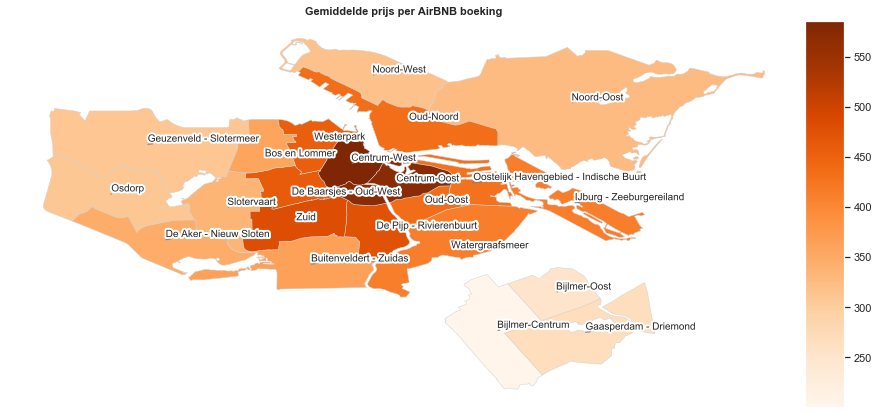

In [58]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patheffects as pe
import adjustText as aT

ax = map_ams.plot('omzet_per_boeking', cmap='Oranges', figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
ax.axis('off')
ax.set_title('Gemiddelde prijs per AirBNB boeking', fontdict={'fontsize': '11', 'fontweight' : '800'})

#Plot buurtnamen
texts = []
for x, y, label in zip(map_ams.centroid.x, map_ams.centroid.y, map_ams["Gebied"]):
    texts.append(plt.text(x, y, label, fontsize = 10, path_effects=[pe.withStroke(linewidth=4, foreground="white")]))

#Trek buurtnamen uit elkaar (geen overlapping)
aT.adjust_text(texts, expand_text=(0.000001, 0.0001), arrowprops=dict(arrowstyle="-", color='gray', lw=1))

#Colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=map_ams.omzet_per_boeking.min(), vmax=map_ams.omzet_per_boeking.max()))
sm._A = []
cbar = plt.colorbar(sm, cax=cax)

plt.show()

# 4. Wat is de return on investment (ROI) van een woning die permanent verhuurd wordt via Airbnb?

### 4.1 Scope ROI
De definitie van return on investment (ROI) is het rendement op een investering.  
ROI bevat twee componenten: 1) investeringen, 2) opbrengsten.  
Bij het component 'investeringen' is de grootste kostenpost de prijs van het hebben, of het huren van een appartement. Deze prijs hangt af van zaken zoals: locatie, omvang, type huis, staat van het huis, inrichting, onderhoud, etc.. De vraag is ook wat voor soorten huizen er op AirBNB worden aangeboden en hoe een potentieel te verhuren huis zich daartoe verhoudt.  
<b>Deze analyse beperkt zich tot de opbrengstzijde van de ROI.</b>  
Op basis van de opbrengst kan een potentiële verhuurder zelf inschatten wat zijn rendement is.

### 4.2 Conclusie 'Wat is de return on investment (ROI) van een woning die permanent verhuurd wordt via Airbnb?''

In [59]:
#Tabel met relevante gegevens voor een potentiële verhuurder
opbrengst_tabel = tabel.copy()
opbrengst_tabel['reviews_per_maand_per_ad'] = opbrengst_tabel['reviews_per_maand_per_ad']*2
opbrengst_tabel = opbrengst_tabel.drop('boekingen_per_maand',axis=1)
opbrengst_tabel = opbrengst_tabel.rename(columns={'reviews_per_maand_per_ad':'aantal_boekingen',
                                                 'omzet_per_ad_per_maand':'omzet'})
opbrengst_tabel = opbrengst_tabel.drop('omzet_per_buurt',axis=1)
opbrengst_tabel['nachten_per_boeking'] = 3.9
opbrengst_tabel['prijs_per_nacht'] = round(opbrengst_tabel['omzet_per_boeking'] / opbrengst_tabel['nachten_per_boeking'],2)
opbrengst_tabel['verhuurnachten'] = round(opbrengst_tabel['aantal_boekingen'] * opbrengst_tabel['nachten_per_boeking'],2)
#Maak logische volgorde van de kolommen
opbrengst_tabel = opbrengst_tabel[['aantal_advertenties','aantal_boekingen','nachten_per_boeking','verhuurnachten', 'prijs_per_nacht','omzet_per_boeking','omzet']]
opbrengst_tabel['omzet_permanent_verhuren']=round(opbrengst_tabel['prijs_per_nacht'] * 365/12).astype('int') #aantal dagen in een maand
#Maak kolomnamen presenteerbaar
opbrengst_tabel.columns = opbrengst_tabel.columns.str.replace('_',' ').str.capitalize()
opbrengst_tabel = opbrengst_tabel.sort_values(by='Omzet permanent verhuren',ascending=False)
print('Een potentiële verhuurder kan op basis van onderstaande tabel inschatten wat zijn ROI is. \nIn de laatste kolom is de omzet bij permanent verhuren weergegeven.')
opbrengst_tabel

Een potentiële verhuurder kan op basis van onderstaande tabel inschatten wat zijn ROI is. 
In de laatste kolom is de omzet bij permanent verhuren weergegeven.


,Aantal advertenties,Aantal boekingen,Nachten per boeking,Verhuurnachten,Prijs per nacht,Omzet per boeking,Omzet,Omzet permanent verhuren
Buurt,,,,,,,,
Centrum-West,1880,2.927213,3.9,11.42,150.17,585.66,1714.34,4568
Centrum-Oost,1346,2.752080,3.9,10.73,146.73,572.23,1574.83,4463
Zuid,1010,1.883663,3.9,7.35,123.24,480.63,905.35,3749
De Pijp - Rivierenbuurt,1624,2.281502,3.9,8.90,121.82,475.11,1083.97,3705
De Baarsjes - Oud-West,2431,2.178824,3.9,8.50,118.19,460.93,1004.28,3595
Westerpark,1029,2.292109,3.9,8.94,116.89,455.87,1044.90,3555
Oud-Oost,806,2.009876,3.9,7.84,111.67,435.52,875.34,3397
Oud-Noord,391,2.379386,3.9,9.28,111.51,434.89,1034.77,3392
Oostelijk Havengebied - Indische Buurt,694,1.835360,3.9,7.16,109.74,427.97,785.47,3338


# 5. Welke overtredingen van regels mbt verhuur vind je in de data? Om hoeveel euro gaat dit ongeveer?

### 5.1 Regels voor AirBNB verhuurders in Amsterdam in 2016
<b>Verhuur volledig appartement:</b>  
• Maximaal aantal verhuurdagen: 60  
• Maximaal aantal huurders per boeking: 4  
• Toeristenbelasting  5%  
• Vakantieverhuur van een sociale huurwoning is verboden  
• Je bent hoofdbewoner, m.a.w. je woont ook daadwerkelijk op dit adres  
  
<b>Verhuur kamer: </b>  
• Maximaal aantal verhuurdagen: geen  
• Maximaal aantal huurders per boeking: 4  
• Toeristenbelasting  5%  
• Je bent hoofdbewoner, m.a.w. je woont ook daadwerkelijk op dit adres

### 5.2 potentiële overtreders
Op basis van deze regels kunnen twee categorieën potentiële overtreders worden gedefinieerd:  
<b>1) Adverteerders die meer dan 60 dagen per jaar een <u>volledig appartement</u> verhuren. </b>  
2) Adverteerders die een niet-eigen-woning/kamer verhuren. De grootschalige overtreders in deze categorie zitten ook in de categorie 'meer dan 60 dagen per jaar verhuren'. 
  
De analyse richt zich op de grootschalige overtreders: categorie 1  
Potentiële overtreders die een niet-eigen-woning/kamer verhuren worden in deze analyse buiten beschouwing gelaten.  
Ter vergelijking van het aanbod per type woning is onderstaande figuur weergegeven.

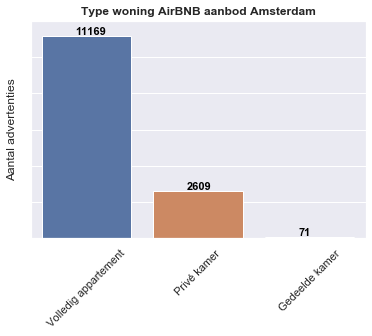

In [60]:
ax = sns.barplot(x=data['room_type'].value_counts().index, y=data['room_type'].value_counts())

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8,6)})
ax.set_title('Type woning AirBNB aanbod Amsterdam',fontsize=12, weight='bold' )
ax.set_xlabel('')
ax.set_ylabel('Aantal advertenties')
ax.set_xticklabels(['Volledig appartement', 'Privé kamer', 'Gedeelde kamer'], rotation=45)
ax.set_yticklabels("")
ax.set_ylim(0,12000)

#plot het aantal boven de bars
for i in ax.patches:
    ax.text(i.get_x()+0.3, i.get_height()+100, \
            str(round((int(i.get_height())), 2)), fontsize=11, color='black', weight='bold',
                rotation=0)
plt.show()

### 5.3 Verhuurders die meer dan 60 dagen per jaar een volledig appartement verhuren

Een overzicht van de overtreders in deze categorie kan worden berekend in twee stappen:  
1) Met het <b> aantal reviews </b> en het <b>aantal reviews per maand</b> wordt berekend hoe lang de advertentie al online staat en wat de plaatsingsdatum is.  
2) Met het <b>aantal reviews per maand</b> en de <b>gemiddelde lengte van een verblijf</b> wordt geschat of een advertentie het limiet van 60 dagen verhuren per jaar overschreidt.

In [61]:
#Voeg kolom toe met plaatsingsdatum per advertentie
import datetime
data['creation_date'] = pd.to_datetime('2016-07-04') - pd.to_timedelta(data['number_of_reviews'] / data['reviews_per_month'] * 30, unit='d')
data['creation_date'] = data['creation_date'].dt.strftime('%Y-%m-%d')

In [62]:
#Voeg kolom toe met geschatte aantal verhuurdagen per advertentie per jaar en zet op max 365 dagen
data['est_yearly_rent_days'] = round(data['reviews_per_month'] * 2 * 12 *3.9).astype('int') #Review rate: 50%, nachten per boeking: 3.9
data.loc[data['est_yearly_rent_days']>365,'est_yearly_rent_days'] = 365

In [69]:
data.sample(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,creation_date,est_yearly_rent_days
4803,12850293,Two Level Amsterdam Apartment,70182844,Chris,Centrum-Oost,52.371406,4.902243,Entire home/apt,160,2,0,NaT,0.00,2,0,NaT,0
13706,4981487,Nice room with panoramic view!,15970778,Pollie,Osdorp,52.351159,4.799897,Private room,69,1,100,2016-06-24,5.55,1,272,2015-01-10,365
1298,12483001,AMSTERDAM JORDAAN spacious loft,46364710,Jeanne,Centrum-West,52.378738,4.883272,Entire home/apt,111,2,0,NaT,0.00,1,9,NaT,0


#### 5.3.1 Aantal potentiële overtreders die meer dan 60 dagen per jaar verhuren

In [64]:
#dataset van potentiële overtreders in categorie 1
potentiele_overtreders = data[(data['room_type']=='Entire home/apt') & (data['est_yearly_rent_days']>60)]
print('Aantal volledige appartementen die potentieel langer dan 60 dagen per jaar verhuurd worden:', potentiele_overtreders.shape[0])
print('Aantal potentiële overtreders in deze categorie:', len(potentiele_overtreders.host_id.unique()))

Aantal volledige appartementen die potentieel langer dan 60 dagen per jaar verhuurd worden: 5665
Aantal potentiële overtreders in deze categorie: 4946


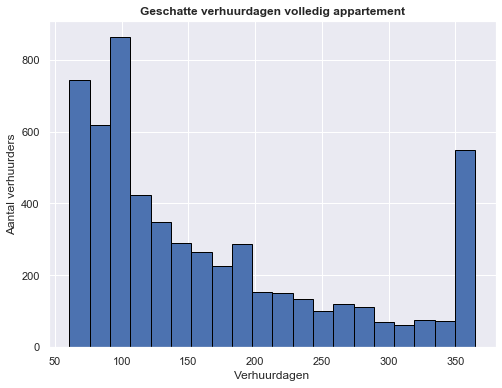

In [65]:
#plot geschatte verhuurdagen per advertentie
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(potentiele_overtreders.est_yearly_rent_days,rwidth=1, edgecolor='black', bins=20)
plt.title('Geschatte verhuurdagen volledig appartement', fontdict={'fontweight':'550'})
plt.xlabel('Verhuurdagen')
plt.ylabel('Aantal verhuurders')
plt.show()

#### 5.3.2 Omzet boven 60 dagen per jaar verhuren

In [66]:
omzet_boven_60_dagen = sum((potentiele_overtreders['est_yearly_rent_days'] - 60) * potentiele_overtreders['price'])
print('Omzet boven 60 dagen: €' + str(omzet_boven_60_dagen))

Omzet boven 60 dagen: €80670907


In [67]:
percentage_overtreding = omzet_boven_60_dagen/(omzet*12)*100
print('Geschatte omzet per jaar totale AirBNB markt in Amsterdam: €' + str(round(omzet*12)).split('.')[0])
print('Geschatte omzet per jaar in overtreding 60 dagen regel: €' + str(omzet_boven_60_dagen) +
      ' (' + str(round(percentage_overtreding,2)) +'%)')

Geschatte omzet per jaar totale AirBNB markt in Amsterdam: €183827095
Geschatte omzet per jaar in overtreding 60 dagen regel: €80670907 (43.88%)


### 5.4 Conclusie 'Welke overtredingen van regels mbt verhuur vind je in de data? Om hoeveel euro gaat dit ongeveer?'

<b>Verhuurders die meer dan 60 dagen per jaar een volledig appartement verhuren</b>  
Aantal volledige appartementen die potentieel langer dan 60 dagen per jaar verhuurd worden: 5.665  
Aantal potentiële overtreders in deze categorie: 4.946  
Geschatte omzet per jaar in overtreding 60 dagen regel: €80.670.907 (43.88% van de totale AirBNB omzet van Amsterdam)  
  
<b>Verhuurders die een niet-eigen-woning/kamer verhuren</b>  
Buiten beschouwing in deze analyse

# 6. Welke aanbeveling zou je aan de gemeente Amsterdam doen op basis van deze data? En welke aanbeveling aan verhuurders? En toeristen?  

### 6.1 aanbeveling gemeente Amsterdam
Als bestuurlijk orgaan voert de gemeente Amsterdam belangrijke taken uit in Amsterdam. Daarbij horen taken in de gebieden van toerisme, economische zaken, openbare orde en veiligheid, huisvesting en wet- en regelgeving. Aangezien er jaarlijks enorm veel toeristen naar Amsterdam komen is vakantieverhuur zoals via AirBNB een groot onderwerp en is het van belang goed beleid te voeren. Deze dataset en de analyse daarvan kan de gemeente helpen op de volgende manieren:  
• De omvang en de opbrengsten van de AirBNB markt inzichtelijk maken  
• Overtreders van regels in kaart brengen  
• Kansen en risico's identificeren

#### 6.1.1 De omvang en de opbrengsten van de AirBNB markt inzichtelijk maken 
Geschatte aantal boekingen per jaar in Amsterdam: <b>390.000</b>  
Geschatte aantal overnachtingen per jaar in Amsterdam: <b>1.5 miljoen</b>  
Geschatte omzet per jaar totale AirBNB markt in Amsterdam: <b>€184 miljoen</b>  

#### 6.1.2 Overtreders van regels in kaart brengen.
Aantal volledige appartementen dat potentieel langer dan 60 dagen per jaar verhuurd wordt: 5665  
Aantal potentiële overtreders die meer dan 60 dagen per jaar verhuren: 4946  
De regel 'alleen eigen woning verhuren' wordt ook in vele gevallen overtreden. De overtreders in deze categorie kunnen worden opgespoort met een gefilterde dataset en vervolgens per individueel geval nagaan of de regel wordt overtreden.

#### 6.1.3.1 Kansen
Verhuurders op AirBNB dienen een toeristenbelasting van 5% af te dragen. Dit kan veel geld opleveren voor de gemeente. Het advies is om drijfveren, al dan niet met boetes, te creëeren om verhuurders aan te sporen hun AirBNB opbrengst aan te geven. Het resultaat hiervaan kan oplopen tot €9.2 miljoen per jaar.

#### 6.1.3.2 Risico's
De data laat zien dat de meeste AirBNB verhuren in de binnenstad plaatsvinden. Veel Amsterdammers zeggen dat juist daar het te druk is, te veel toeristen zijn en te veel overlast is. Aan de andere kan is het begrijpelijk dat toeristen in de binnenstad willen huren. Het advies is om een limiet van verhuurders per gebied te onderzoeken.

### 6.2 aanbeveling verhuurders
Verhuur enkel een kamer in het appartement. In dat geval hoef je niet te voldoen aan de regel 'maximaal 60 dagen per jaar verhuren'.
Verhuur je toch je hele woning, zorg dan dat je niet te veel reviews krijgt en/of verhuur met meerdere accounts.
Nooit meer dan één advertentie per account online hebben staan. 

### 6.3 aanbeveling toeristen
Wil je een centrale locatie en ben je bereid meer te betalen, huur dan in Centrum-West, Centrum-Oost, De Baarsjes - Oud-West of De Pijp - Rivierenbuurt.  
Wil je minder betalen en toch in de buurt van het centrum huren, huur dan in Bos en Lommer.  
Wil je zo goedkoop mogelijk, huur dan in Bijlmer-Centrum.

